In [76]:
import datetime as datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

%matplotlib inline

In [77]:
#nivel educativo
postulantes_educacion = pd.read_csv("datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv", low_memory=False)

#fecha de nacimiento y genero
postulantes_genero_y_edad = pd.read_csv("datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)

#vistas de avisos online y offline
vistas = pd.read_csv("datos/datos_navent_fiuba/fiuba_3_vistas.csv", low_memory=False)

#postulaciones hasta el 1ro de marzo 2018
postulaciones = pd.read_csv("datos/datos_navent_fiuba/fiuba_4_postulaciones.csv", low_memory=False)

#avisos online al 8 de marzo de 2018
avisos_online = pd.read_csv("datos/datos_navent_fiuba/fiuba_5_avisos_online.csv", low_memory=False)

#detalle de avisos vistos y postulados tanto offline como online
avisos_detalle = pd.read_csv("datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", low_memory=False)

##  ¿Cual es la distribucion de Estudiantes universitario postulantes a trabajos Full-Time y Part-Time?

In [78]:
result = postulaciones.join(postulantes_educacion.set_index('idpostulante'), on='idpostulante')
postulantes_universitarios = result[result['nombre']=='Universitario']
postulantes_universitarios_en_Curso = postulantes_universitarios[postulantes_universitarios['estado']=='En Curso']

postulantes_universitarios_en_Curso.head()

,idaviso,idpostulante,fechapostulacion,nombre,estado
88,1112266605,8BkL,2018-01-18 09:56:10,Universitario,En Curso
89,1112283039,8BkL,2018-01-24 11:01:01,Universitario,En Curso
90,1112264774,8BkL,2018-01-24 11:06:16,Universitario,En Curso
91,1112283631,8BkL,2018-02-07 06:53:24,Universitario,En Curso
92,1112342608,8BkL,2018-02-17 17:40:55,Universitario,En Curso


In [79]:
total = postulantes_universitarios_en_Curso.join(avisos_detalle.set_index('idaviso'), on='idaviso')
total = total[['idpostulante','tipo_de_trabajo']]

total = total.dropna(subset=['tipo_de_trabajo'])

full_time = total[(total['tipo_de_trabajo']=='Full-time')]
part_time = total[(total['tipo_de_trabajo']=='Part-time')]

total.head()

,idpostulante,tipo_de_trabajo
88,8BkL,Full-time
89,8BkL,Full-time
90,8BkL,Full-time
92,8BkL,Full-time
93,8BkL,Full-time


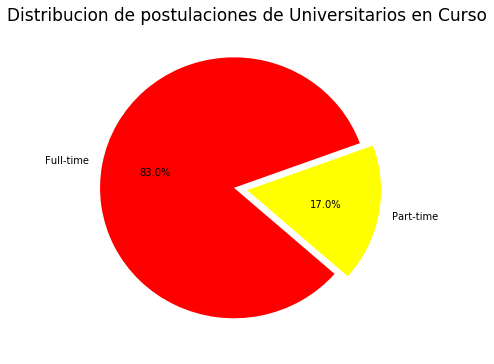

In [80]:
sizes = [full_time.tipo_de_trabajo.count(), part_time.tipo_de_trabajo.count()]
nombres = ['Full-time', 'Part-time']

plt.figure(figsize=(6, 6))
plt.title('Distribucion de postulaciones de Universitarios en Curso', fontsize=17)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'yellow'], explode=(0.1, 0))
plt.show()

# ¿Cuál es el promedio en cantidad de postulaciones entre hombres y mujeres?

In [81]:
postulantes_genero_y_edad['cant_postulantes'] = 1

#le sumo la xolumna edad por q viene la fecha de nacimiento y no la edad especifica
postulantes_genero_y_edad['edad'] =  2018 - postulantes_genero_y_edad[postulantes_genero_y_edad['fechanacimiento'].notnull()]['fechanacimiento'].apply(lambda x: x.split('-')[0]).apply(np.int64)
#aca no me dejaba convertir la col edad de float a int por los nan's asii q converti los nana a 0 y conveti toda la col en int
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0.0).apply(np.int64)

#saque los valores ridiculos
postulantes_edades_validas = postulantes_genero_y_edad[(postulantes_genero_y_edad['edad'] > 17) & (postulantes_genero_y_edad['edad'] < 100)]

postulantes_mujer  = postulantes_edades_validas[ postulantes_edades_validas['sexo'] =='FEM' ]
postulantes_hombre = postulantes_edades_validas[ postulantes_edades_validas['sexo'] =='MASC' ]

In [82]:
postulaciones_mujer = pd.merge(postulantes_mujer, postulaciones, on='idpostulante', how='left')
postulaciones_hombre = pd.merge( postulantes_hombre, postulaciones, on='idpostulante', how='left')

In [83]:
postulaciones_mujer.head()

,idpostulante,fechanacimiento,sexo,cant_postulantes,edad,idaviso,fechapostulacion
0,NM5M,1970-12-03,FEM,1,48,1112257047,2018-01-15 16:22:34
1,NM5M,1970-12-03,FEM,1,48,1111920714,2018-02-06 09:04:50
2,NM5M,1970-12-03,FEM,1,48,1112346945,2018-02-22 09:04:47
3,NM5M,1970-12-03,FEM,1,48,1112345547,2018-02-22 09:04:59
4,5awk,1962-12-04,FEM,1,56,1112237522,2018-01-25 18:55:03


In [84]:
postulaciones_hombre.head()

,idpostulante,fechanacimiento,sexo,cant_postulantes,edad,idaviso,fechapostulacion
0,NdJl,1969-05-09,MASC,1,49,1112261212,2018-01-16 08:50:30
1,NdJl,1969-05-09,MASC,1,49,1112273308,2018-01-23 07:53:47
2,NdJl,1969-05-09,MASC,1,49,1112281548,2018-01-24 05:10:12
3,NdJl,1969-05-09,MASC,1,49,1112260409,2018-01-24 05:17:29
4,NdJl,1969-05-09,MASC,1,49,1112293547,2018-01-29 15:41:43


In [85]:
postulaciones_mujer.groupby('idpostulante').agg({'cant_postulantes':'count'})['cant_postulantes'].sort_values(ascending=False).head(10)

idpostulante
8MaQjP3    1414
4rNzLje    1213
JBmav1r    1030
ZQZJJb      978
aWY5D5      947
ow2oqjW     927
56XJzM      909
qevreVR     805
wVXQL3w     732
5354Mw      714
Name: cant_postulantes, dtype: int64

In [86]:
postulaciones_hombre.groupby('idpostulante').agg({'cant_postulantes':'count'})['cant_postulantes'].sort_values(ascending=False).head(10)

idpostulante
axmjOE     3166
6rQdqjl    1773
5Mwjak     1485
KBzm0ZX    1176
NzrpkBD    1099
4rPx4jR    1059
jk5aQ1b    1013
5mraqEZ     998
av69dW      963
vVjZ16P     859
Name: cant_postulantes, dtype: int64

# ¿Ver la distribucion de postulantes que estuvieron postulandose durante todo Enero y Febrero del 2018?

In [117]:
postulaciones[postulaciones['idpostulante']=='axmjOE']['mes_postulacion'].value_counts()

2    1825
1    1341
Name: mes_postulacion, dtype: int64

In [118]:
# TODO COMPLETAR!!!
#postulaciones.groupby(['idpostulante','mes_postulacion']).agg({'mes_postulacion':'count'})['mes_postulacion'].sort_values(ascending=False)
postulaciones.groupby(['idpostulante','mes_postulacion']).agg({'mes_postulacion':'count'}).head()

mes_postulacion
idpostulante mes_postulacion                 
0z5VvGv      1                              4
             2                             30
0zB026d      2                              3
0zB03O9      2                             17
0zB08lq      2                              1

# ¿De los que se postularon los primeros dias de enero y hallan hecho pocas vistas de postulaciones ver si los dias posteriores no hicieron posterios alguna?

Con la respuesta de esta pregunta se tiene que poder deducir o no que los usuarios con menos postulaciones los primeros dias de enero no se postularon mas la segunda mitad de enero y todo febrero porque ya fue contratado.